In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Platform': ['Instagram', 'Twitter', 'YouTube', 'Instagram', 'Twitter', 'YouTube', 'Facebook', 'Facebook'],
    'Likes': [150, 120, 200, 180, 160, 300, 130, 140],
   'Hour': [2, 3, 4, 5, 3, 2, 1, 6],
    'Year': [2021, 2022, 2022, 2023, 2023, 2023, 2021, 2022] }
df = pd.DataFrame(data)
df.to_csv("social_media_eda.csv", index=False)

In [3]:
try:
    df = pd.read_csv("social_media_eda.csv")
except FileNotFoundError:
    print("Dataset not found. Please make sure 'social_media_eda.csv' is available.")
    exit()

print("Dataset Preview:")
print(df.head())

Dataset Preview:
    Platform  Likes  Hour  Year
0  Instagram    150     2  2021
1    Twitter    120     3  2022
2    YouTube    200     4  2022
3  Instagram    180     5  2023
4    Twitter    160     3  2023


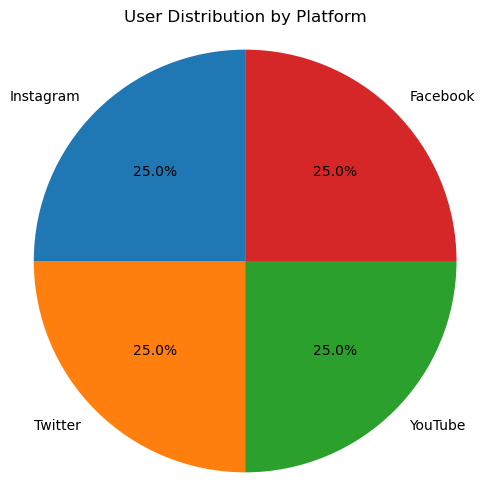

In [8]:
# --- PIE CHART: Distribution across platforms ---
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("User Distribution by Platform")
plt.axis('equal')
plt.show()

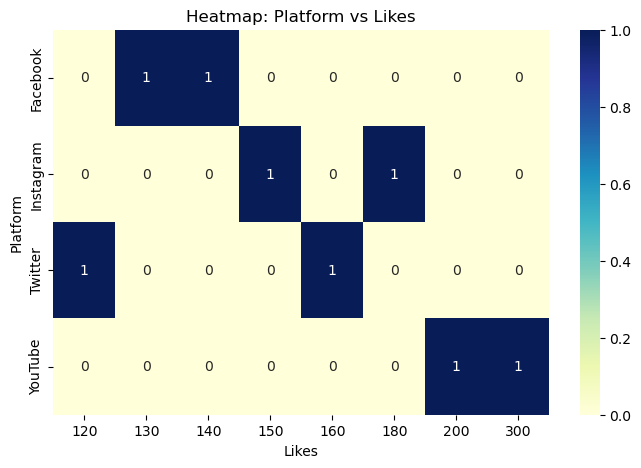

In [7]:
# --- HEATMAP: Likes per platform ---
heat_data = df.pivot_table(index='Platform', columns='Likes', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Platform vs Likes")
plt.show()

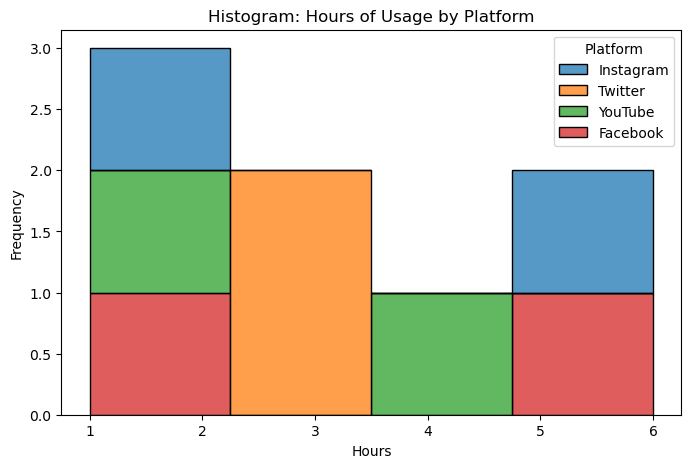

In [6]:
# --- HISTOGRAM: Hourly social media usage ---
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Hour', hue='Platform', multiple='stack')
plt.title("Histogram: Hours of Usage by Platform")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

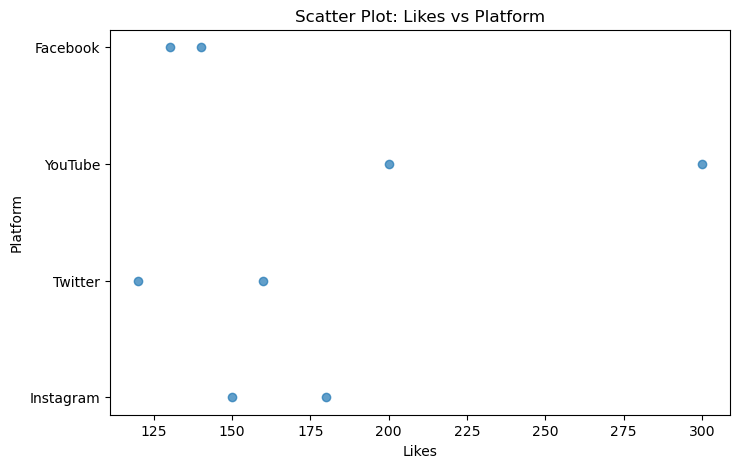

In [5]:
# --- SCATTER PLOT: Likes vs Platform ---
plt.figure(figsize=(8, 5))
plt.scatter(df['Likes'], df['Platform'], alpha=0.7)
plt.title("Scatter Plot: Likes vs Platform")
plt.xlabel("Likes")
plt.ylabel("Platform")
plt.show()

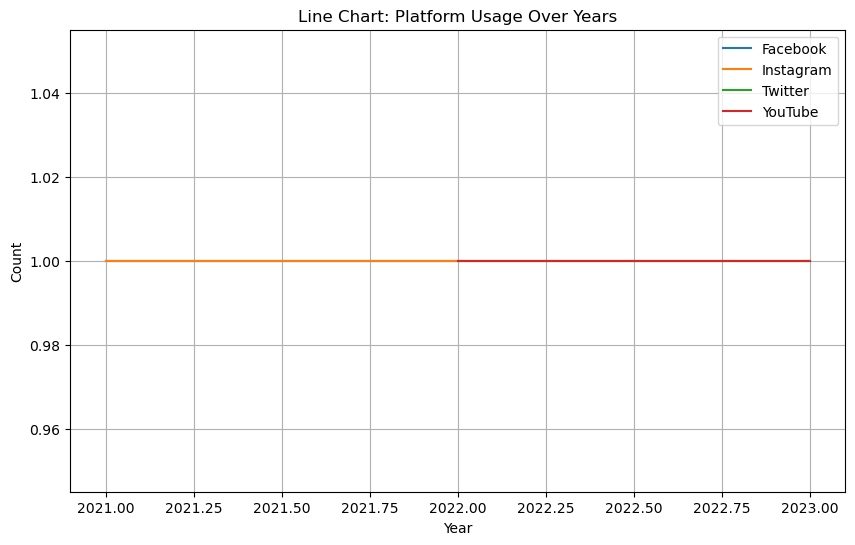

In [4]:
# --- LINE CHART: Platform usage over the years ---
yearly_counts = df.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
for platform in yearly_counts['Platform'].unique():
    data = yearly_counts[yearly_counts['Platform'] == platform]
    plt.plot(data['Year'], data['Count'], label=platform)

plt.title("Line Chart: Platform Usage Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()